# 新手教程—Seaborn库使用示例

Seaborn是Python常用的统计数据可视化库，以下内容简单介绍Seaborn如何使用。

In [1]:
#导入需要的程序包
import pandas as pd
import seaborn as sns

## 股票收益曲线示例

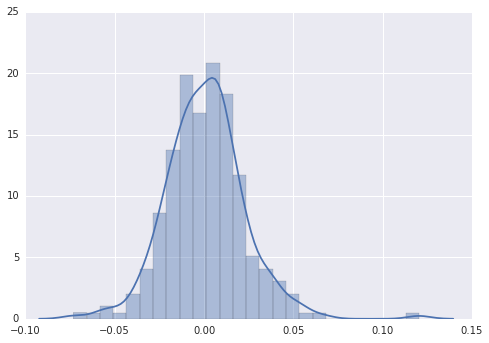

In [2]:
# 获取600196.XSHG的2019年01月的日级数据, 只获取open+close字段
df = get_price('600196.XSHG', start_date='2019-01-01', end_date='2019-01-31', frequency='daily', fields=['open','close']) 
returns = df.pct_change().dropna()
sns.distplot(returns.iloc[:,0:1])

## 股票相关性分析

### 两只股票的相关性分析

我们可以比较不同股票的相关性，通过线性回归，画出不同股票的拟合曲线、置信区间（阴影区域）、皮尔森回归系数以及P值。

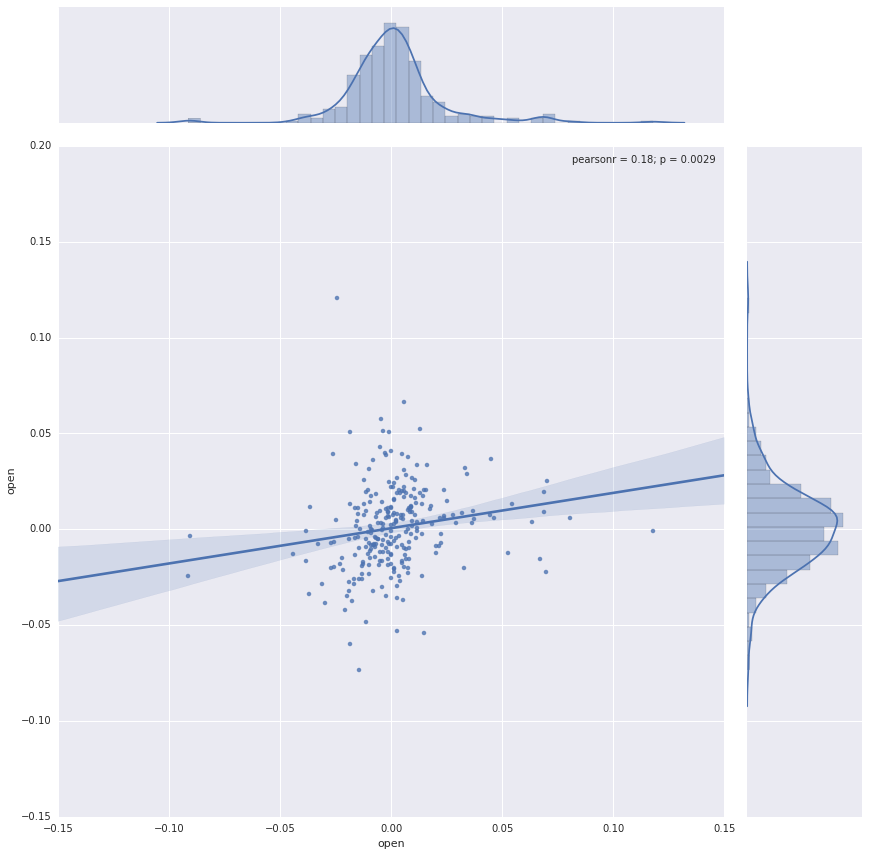

In [3]:
pingan = get_price('000001.XSHE', start_date='2019-01-01', end_date='2019-02-01', frequency='daily', fields=['open'])
fuxing = get_price('600196.XSHG', start_date='2019-01-01', end_date='2019-02-01', frequency='daily', fields=['open'])

returns_pingan = pingan.pct_change().dropna()
returns_fuxing = fuxing.pct_change().dropna()

sns.jointplot(returns_pingan['open'], returns_fuxing['open'], kind='reg', size=12)

从以上各图，可以分析两只股票之间是否存在一个可能的投资机会，如果散点均匀分布在直线周围，表明两个股票有较强的相关性。

### 多支股票相关性分析

同一板块的股票相关性较强，我们以农业板块（A01）的股票作为示例分析多支股票的相关性。

In [8]:
df = get_price(get_industry_stocks('A01'), fields=('close',))['close']
df

,000998.XSHE,002041.XSHE,300087.XSHE,300143.XSHE,300189.XSHE,600108.XSHG,600313.XSHG,600354.XSHG,600359.XSHG,600371.XSHG,600506.XSHG,600540.XSHG,600598.XSHG,601118.XSHG
2015-01-05,19.77,12.84,5.21,12.76,6.78,9.53,11.39,8.81,10.92,10.66,11.33,8.16,10.17,8.88
2015-01-06,20.17,13.05,5.38,12.76,6.95,9.77,11.70,8.75,11.08,10.82,11.62,8.30,10.51,9.15
2015-01-07,20.01,12.98,5.32,11.48,6.89,10.00,11.90,8.85,11.07,10.81,11.54,8.28,10.54,9.03
2015-01-08,20.56,13.16,5.44,10.58,6.93,9.79,12.00,8.89,11.12,10.87,11.81,8.30,10.56,8.85
2015-01-09,20.19,13.01,5.30,10.39,6.80,9.43,11.61,8.60,10.80,10.58,11.73,8.19,10.43,8.61
2015-01-12,19.65,13.11,5.14,10.07,6.66,9.47,11.58,8.47,10.73,10.38,11.34,8.09,10.42,8.89
2015-01-13,20.03,13.28,5.32,10.36,6.82,9.52,11.87,8.78,10.90,10.51,11.54,8.12,10.44,8.94
2015-01-14,19.64,13.09,5.24,10.13,6.69,9.47,11.68,8.64,10.88,10.45,11.84,8.17,10.17,8.75
2015-01-15,19.80,13.18,5.33,10.18,6.76,9.58,11.79,8.65,11.11,10.55,11.86,8.28,10.35,8.90
2015-01-16,20.21,13.40,5.50,10.26,6.89,10.02,12.14,8.80,11.25,10.73,11.98,8.34,10.51,9.09


In [9]:
df1 = df.iloc[:,0:5]
df1

,000998.XSHE,002041.XSHE,300087.XSHE,300143.XSHE,300189.XSHE
2015-01-05,19.77,12.84,5.21,12.76,6.78
2015-01-06,20.17,13.05,5.38,12.76,6.95
2015-01-07,20.01,12.98,5.32,11.48,6.89
2015-01-08,20.56,13.16,5.44,10.58,6.93
2015-01-09,20.19,13.01,5.30,10.39,6.80
2015-01-12,19.65,13.11,5.14,10.07,6.66
2015-01-13,20.03,13.28,5.32,10.36,6.82
2015-01-14,19.64,13.09,5.24,10.13,6.69
2015-01-15,19.80,13.18,5.33,10.18,6.76
2015-01-16,20.21,13.40,5.50,10.26,6.89


使用pct_change()计算收益率，使用dropna去除缺失值，使用distplot画出直方分布图。

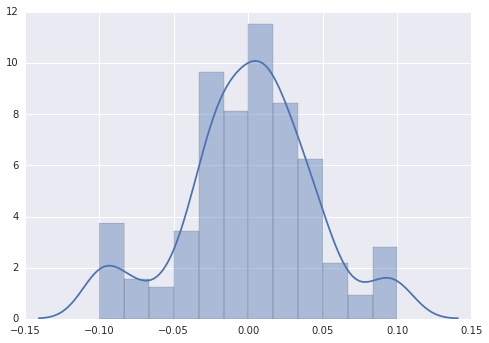

In [10]:
returns = df1.pct_change().dropna()
sns.distplot(returns.iloc[:,0:1])

如果有多组数据需要通过统计分布图进行比较，可以使用violinplot得到小提琴图。

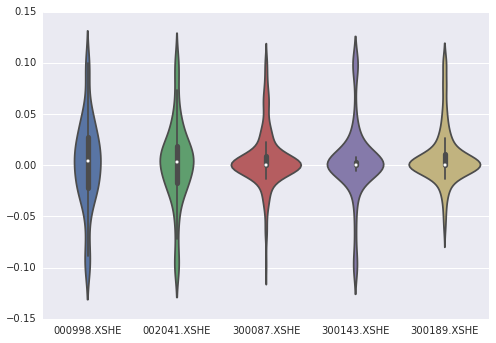

In [16]:
sns.violinplot(returns,size=24)

使用pairplot画出散点图，通过散点图分析两两之间的关系

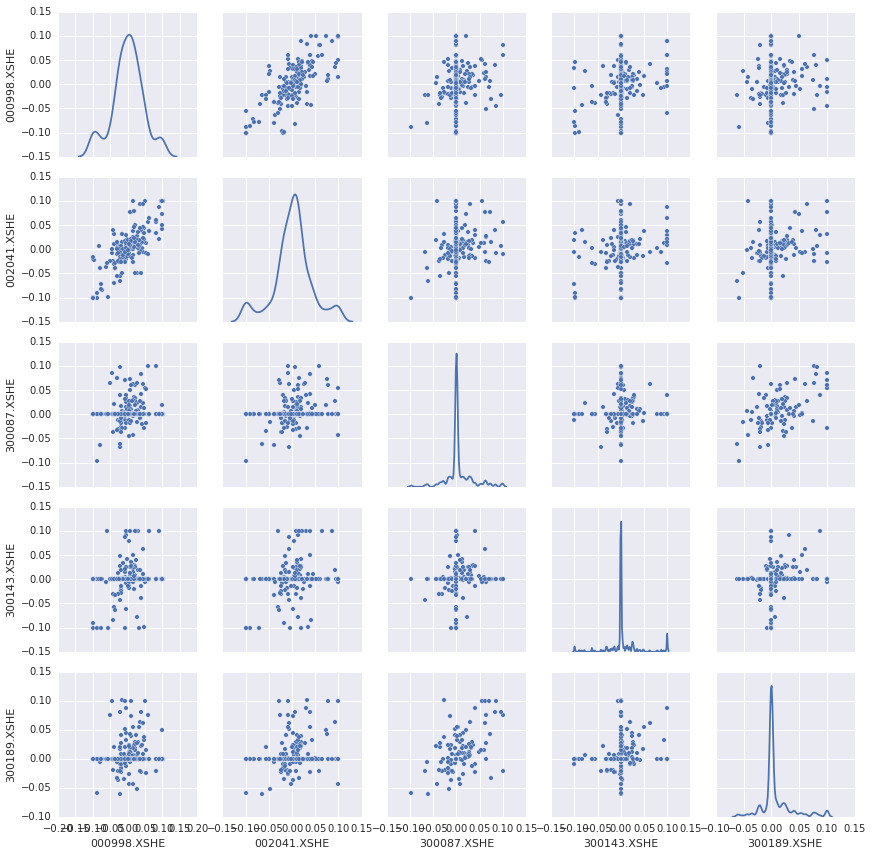

In [12]:
sns.pairplot(returns, diag_kind='kde', size=2.4)

## 更多相关性分析方法

我们可以通过使用heatmap更系统地探索相关性

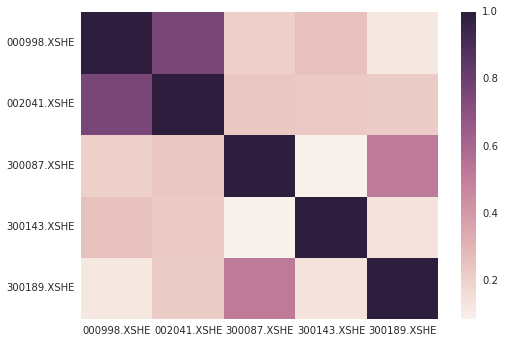

In [13]:
sns.heatmap(returns.corr())

还可以通过clustermap画出聚类图，将相近的聚成一类；您可以通过查阅机器学习相关书籍了解更多过关于聚类的信息。

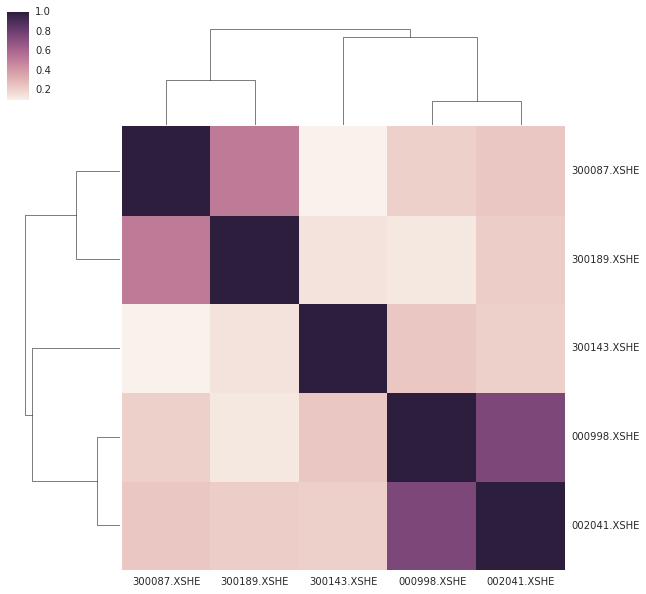

In [30]:
sns.clustermap(returns.corr())

In [4]:
sns.clustermap?